# Week 1 — Repo, Setup, and First Data Pull

## Goals

* Create the Git repo and project structure
* Set up a virtual environment
* Install `pandas` and `yfinance`
* Download SPY daily data and save to disk

## Folder structure

```
src/trading_platform/data/
data/raw/
```

## Install dependencies

```bash
pip install pandas yfinance
```

## yfinance client (`src/trading_platform/data/yfinance_client.py`)

```python
import yfinance as yf
import pandas as pd


def download_data(symbol: str, start: str, end: str) -> pd.DataFrame:
    df = yf.download(symbol, start=start, end=end, interval="1d")
    df = df[["Open", "High", "Low", "Close", "Volume"]]
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    return df
```

## Save to disk

```python
from pathlib import Path


def save_to_csv(df, symbol):
    Path("data/raw").mkdir(parents=True, exist_ok=True)
    df.to_csv(f"data/raw/{symbol}.csv")
```

## Run script

```python
from yfinance_client import download_data, save_to_csv

df = download_data("SPY", "2015-01-01", "2024-01-01")
save_to_csv(df, "SPY")
print(df.head())
```

## Outcome

You can fetch and store market data locally.


In [1]:
import yfinance as yf
import pandas as pd

In [4]:
# create a stock ticker input (let's go with tesla for this example)
stock_ticker = "TSLA"
start_date = "2020-01-01"
end_date = "2023-01-01"

In [15]:
#?yf.download

In [34]:
df = yf.download(stock_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [35]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [37]:
# if df.columns is a MultiIndex
df2 = df.copy()
# df.columns = df.columns.droplevel(1)  # drop the "Ticker"/TSLA level
# or: df.columns = df.columns.droplevel("Ticker")  # if the level is named

df2.columns = df.columns.droplevel("Ticker")  # if the level is named
df2=df2[['Open', 'High', 'Low', 'Close']]

<Axes: title={'center': 'TSLA Stock Prices from 2020-01-01 to 2023-01-01'}, xlabel='Date'>

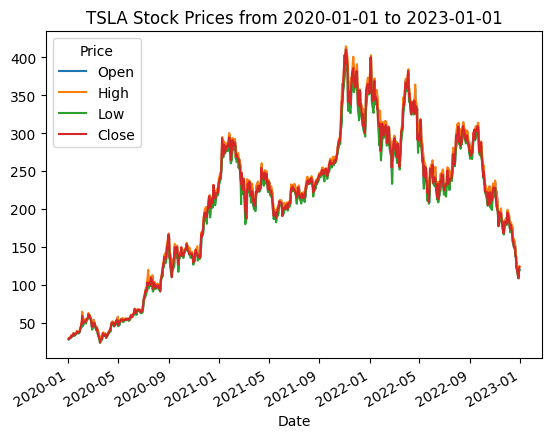

In [38]:
df2.plot(title=f"{stock_ticker} Stock Prices from {start_date} to {end_date}")

## Now, let's turn this into a function

In [43]:
def get_stock_data(ticker:str, start:str, end:str) -> pd.DataFrame:
    """
    This kickass function is going to get stock data from yfinance and return a cleaned DataFrame.
    """
    df = yf.download(ticker, start=start, end=end)
    df.columns = df.columns.droplevel("Ticker")  # if the level is named
    df=df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df = df.sort_index()
    print(f"Data fetched successfully for ticker {ticker} from {start} to {end}.")
    return df

In [44]:
data = get_stock_data("AAPL", "2020-01-01", "2023-12-31")

[*********************100%***********************]  1 of 1 completed

Data fetched successfully for ticker AAPL from 2020-01-01 to 2023-12-31.


# Now we save!


In [47]:
from pathlib import Path

In [48]:
# Create a directory to save data if it doesn't exist
Path("data").mkdir(parents=True, exist_ok=True)

# Save the data to a CSV file
data.to_csv("data/AAPL_stock_data.csv")
